In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
values = pd.read_csv("https://raw.githubusercontent.com/hsaripalli/Pump-It-Up/main/Training_set_values.csv")
labels = pd.read_csv("https://raw.githubusercontent.com/hsaripalli/Pump-It-Up/main/Training_set_labels.csv")
test = pd.read_csv("https://raw.githubusercontent.com/hsaripalli/Pump-It-Up/main/Test_set_values.csv")

In [ ]:
def encode_dates(df, column):
    
    df[column] = pd.to_datetime(df[column])
    df[column + '_year'] = df[column].apply(lambda x: x.year)
    df[column + '_month'] = df[column].apply(lambda x: x.month)
    df = df.drop(column, axis = 1)
    
    return df

In [ ]:
def preprocess_inputs(df):
    
    #drop unnecessary columns
   
    df = df.drop(['id', 'scheme_name', 'amount_tsh', 'num_private', 'recorded_by', 'management_group',
                  'extraction_type', 'extraction_type_class', 'payment_type', 'quality_group',
                  'quantity_group', 'source_type', 'waterpoint_type_group', 'wpt_name'], axis = 1)
    
    return df

In [ ]:
# Numeric columns to replace 0 with NaN

def replace_0_group_mean(df, column):

    df[column] = df[column].replace(0, np.nan)

    for i in column:
      df[i] = df[i].fillna(df.groupby('basin')[i].transform('mean'))

    return df

In [ ]:
# Convert int/ float to object

def float_object(df, column):

  for i in column:
    df[i] = df[i].astype(str)
  return df

In [ ]:
#Pre- Process Data

# Add year and month column from date_recorded
values = encode_dates(values, column = 'date_recorded')

# Drop irrelevant columns
X = preprocess_inputs(values)

# Replace 0 with basin grouped means
X = replace_0_group_mean(X, ['gps_height', 'longitude', 'population', 'construction_year'])

# Convert int/ float to object
X = float_object(X, ['region_code', 'district_code', 'date_recorded_year', 'date_recorded_month'])

In [ ]:
values = X.copy()

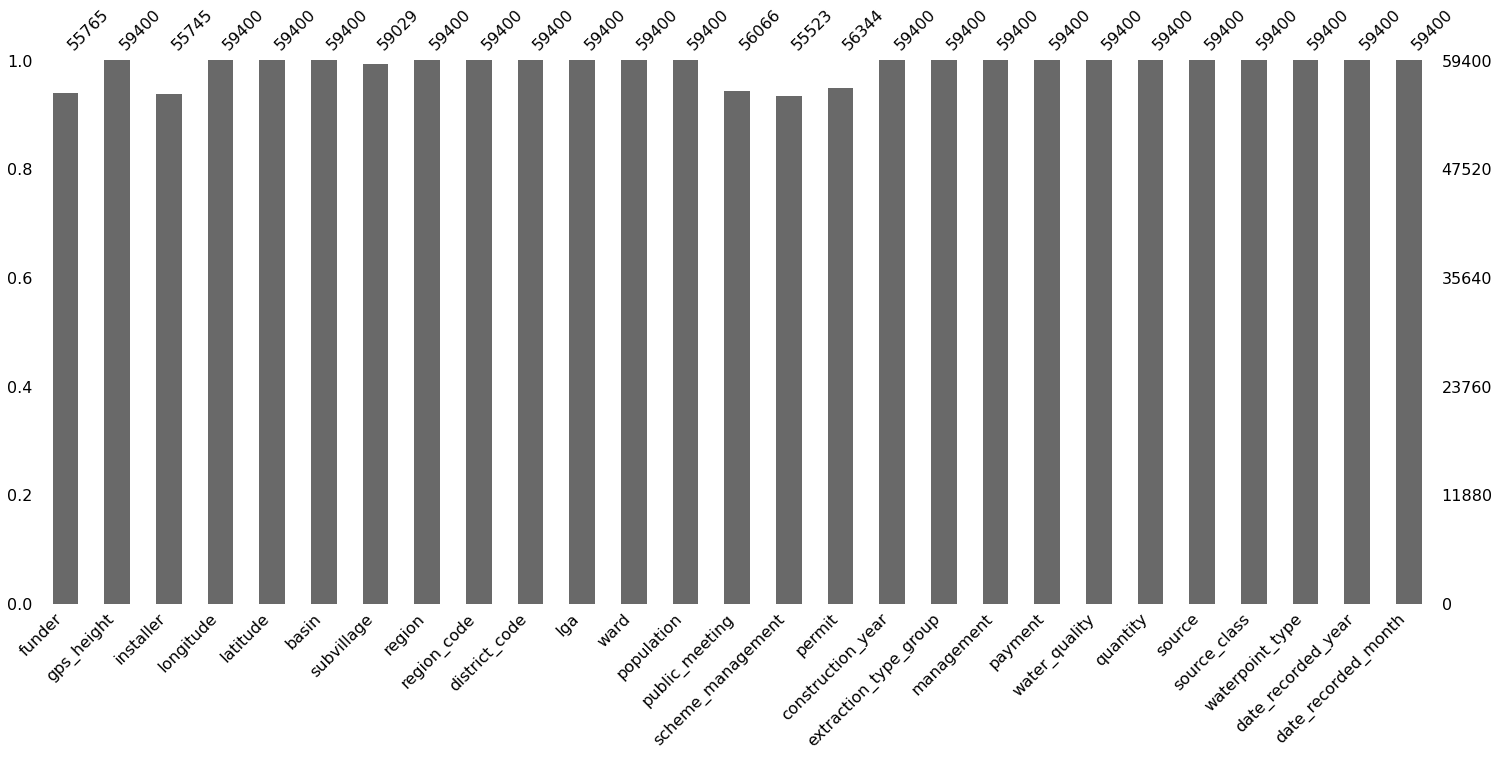

In [ ]:
import missingno as msno

msno.bar(values)

In [ ]:
# COLUMNS WITH TOO MANY UNIQUE VALUES

#funder                    1897
#installer                 2145
#wpt_name                 37400
#subvillage               19287
#lga                        125
#ward                      2092
#scheme_name               2696

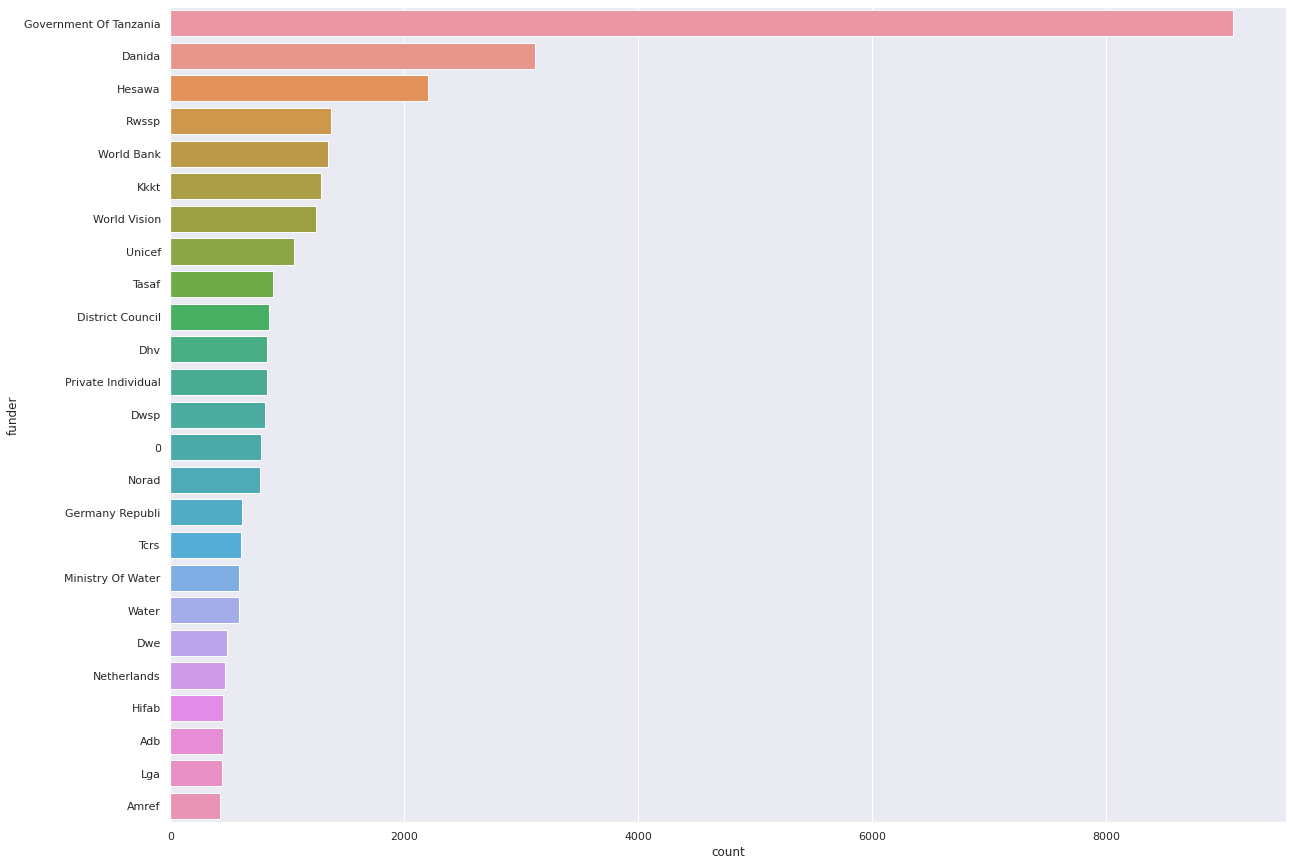

In [ ]:
sns.set(rc = {'figure.figsize':(20,15)})

funder = sns.countplot(y = 'funder', data = values,
                       order=values.funder.value_counts().iloc[:25].index)

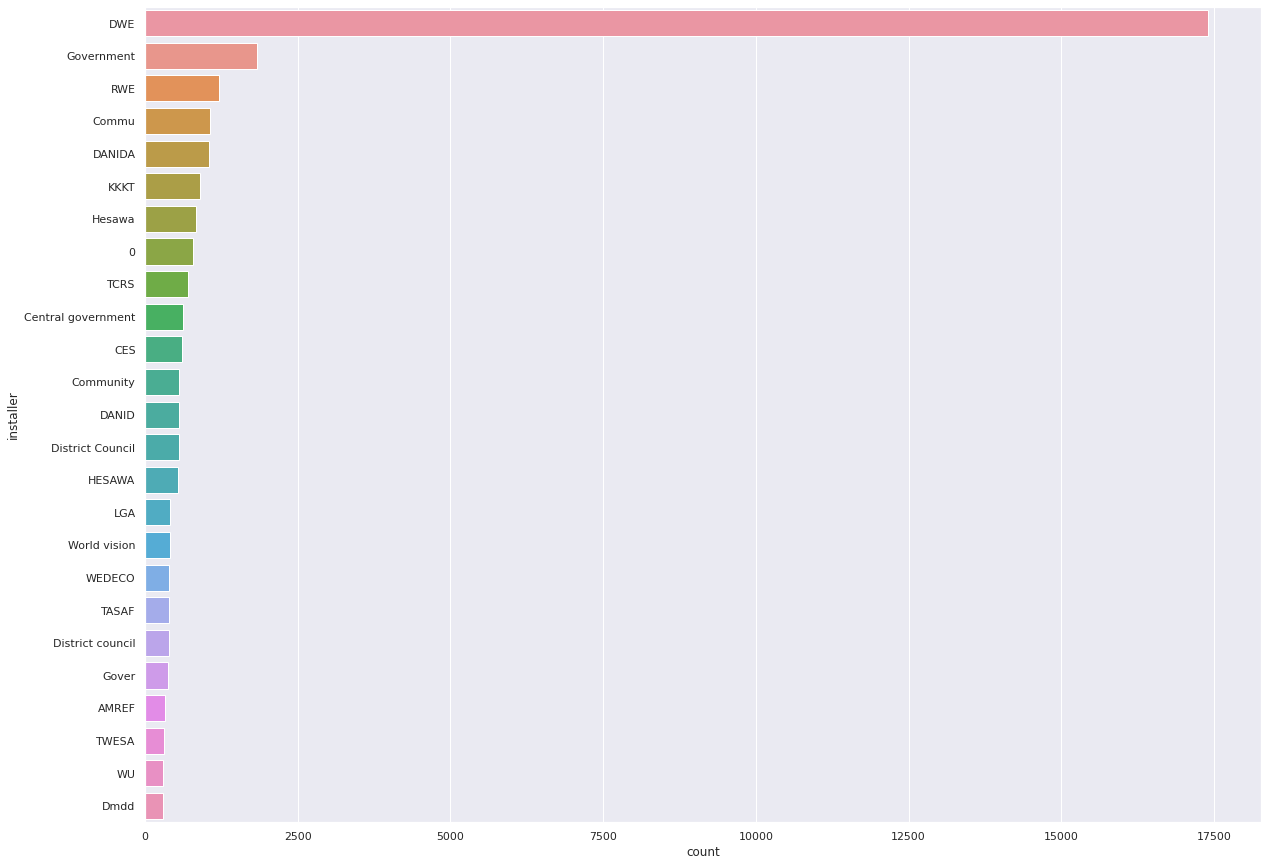

In [ ]:
installer = sns.countplot(y = 'installer', data = values,
                       order=values.installer.value_counts().iloc[:25].index)

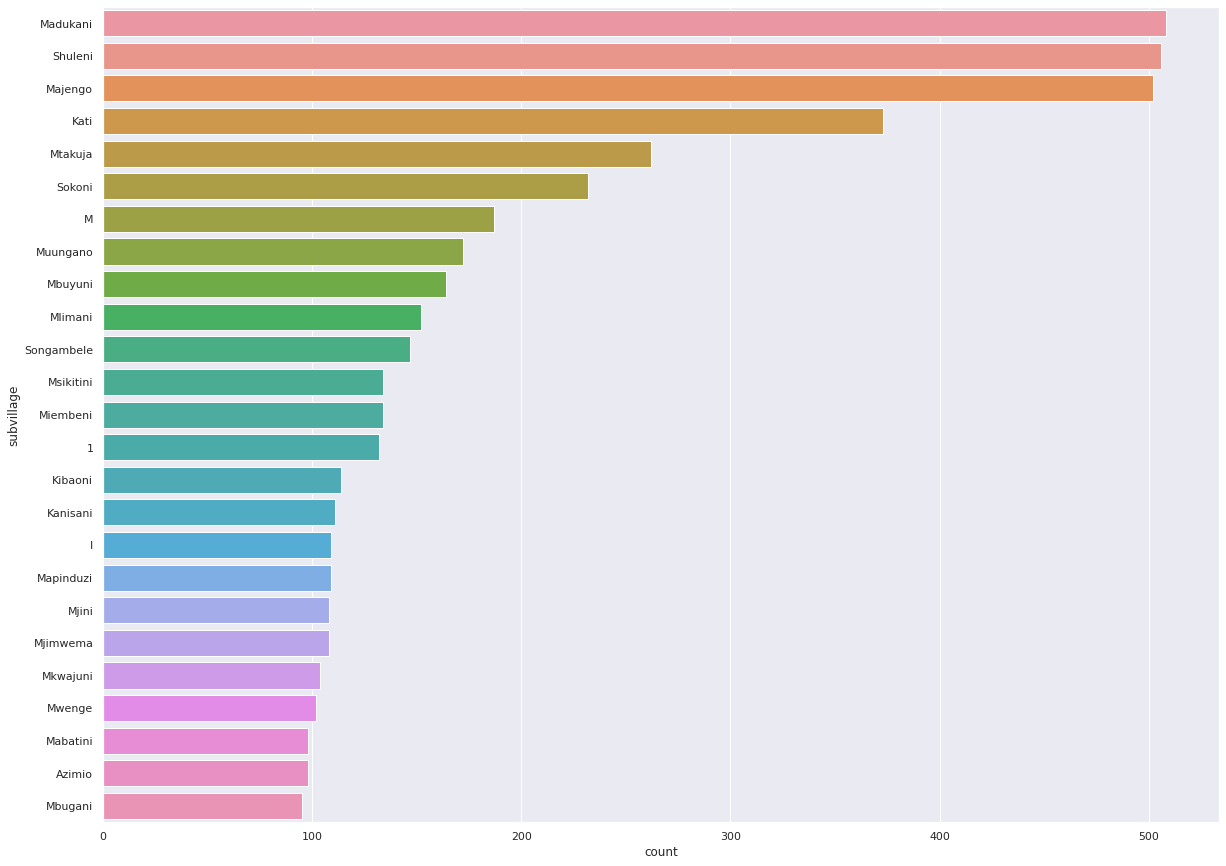

In [ ]:
subvillage = sns.countplot(y = 'subvillage', data = values,
                       order=values.subvillage.value_counts().iloc[:25].index)

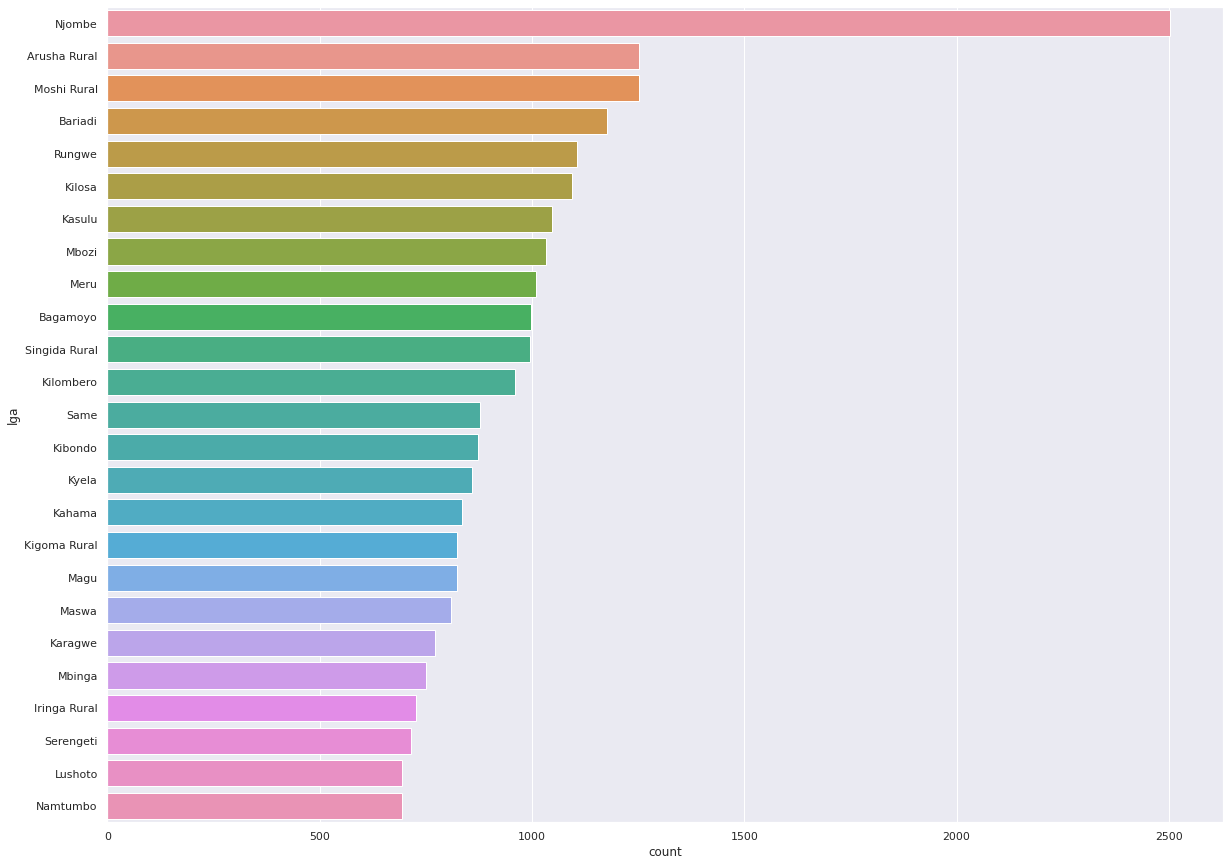

In [ ]:
lga = sns.countplot(y = 'lga', data = values,
                       order=values.lga.value_counts().iloc[:25].index)

In [ ]:
# COLUMNS WITH NOT TOO MANY UNIQUE

#COLUMN                      #UNIQUE VALUES
#basin                        9
#region                      21
#public_meeting               2
#recorded_by                  1
#scheme_management           12
#permit                       2
#extraction_type             18
#extraction_type_group       13
#extraction_type_class        7
#management                  12
#management_group             5
#payment                      7
#payment_type                 7
#water_quality                8
#quality_group                6
#quantity                     5
#quantity_group               5
#source                      10
#source_type                  7
#source_class                 3
#waterpoint_type              7
#waterpoint_type_group        6

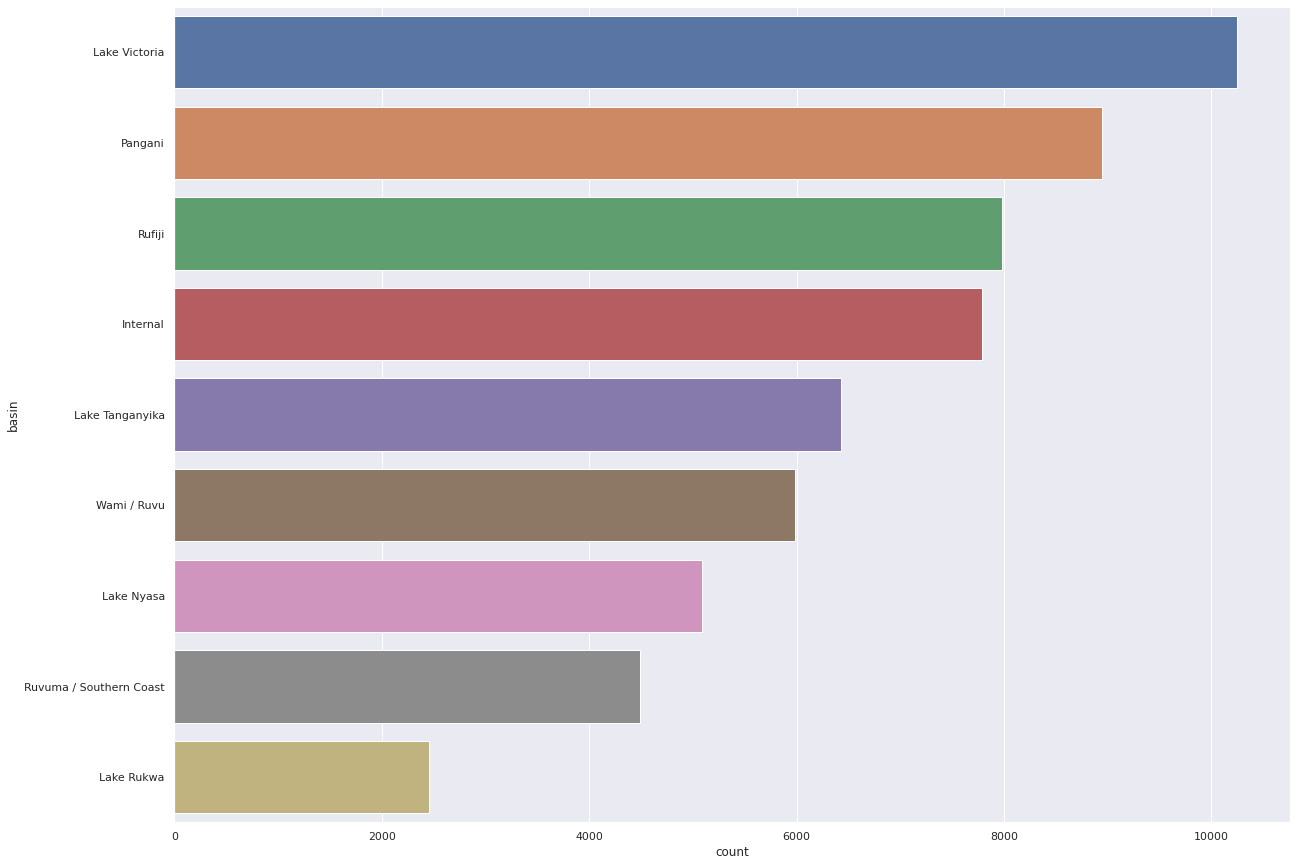

In [ ]:
basin = sns.countplot(y = 'basin', data = values, 
                      order=values.basin.value_counts().iloc[:25].index)

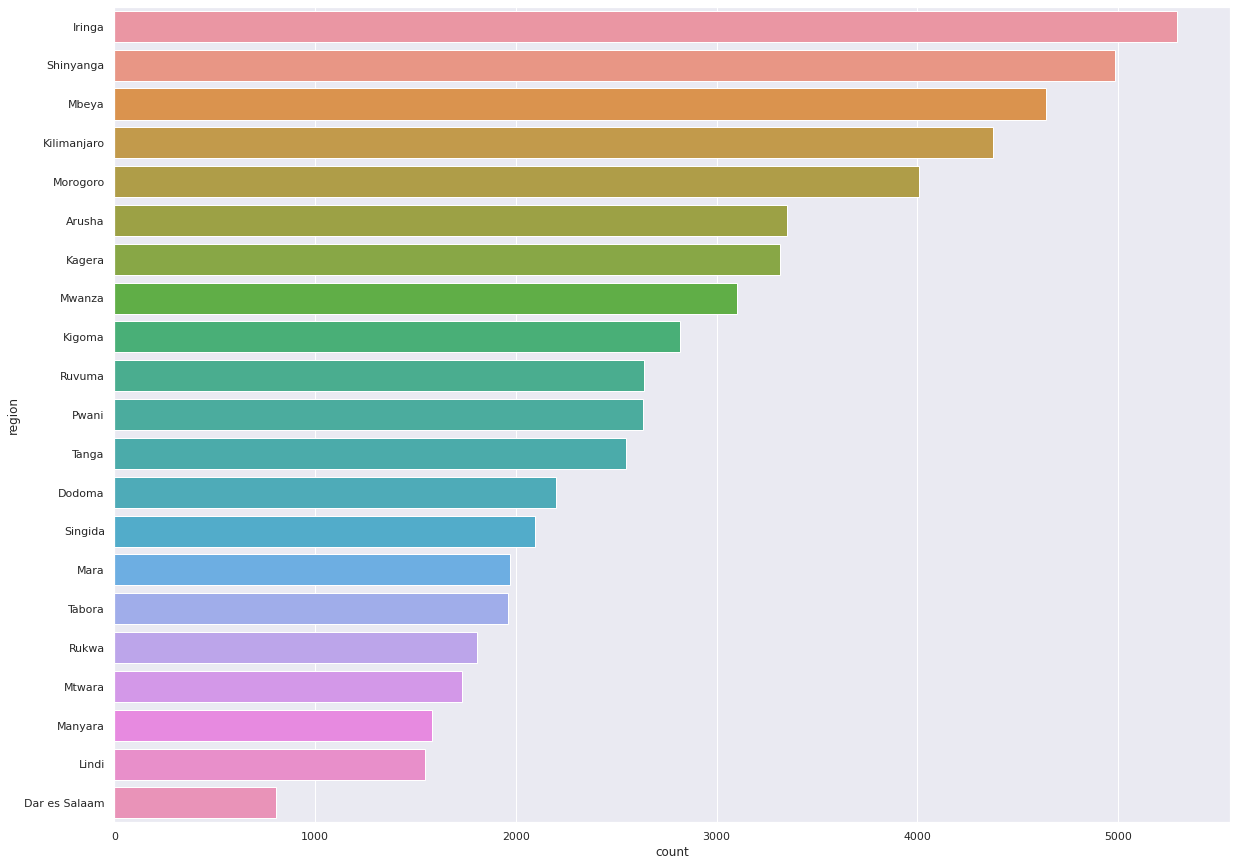

In [ ]:
region = sns.countplot(y = 'region', data = values,
                       order=values.region.value_counts().iloc[:25].index)

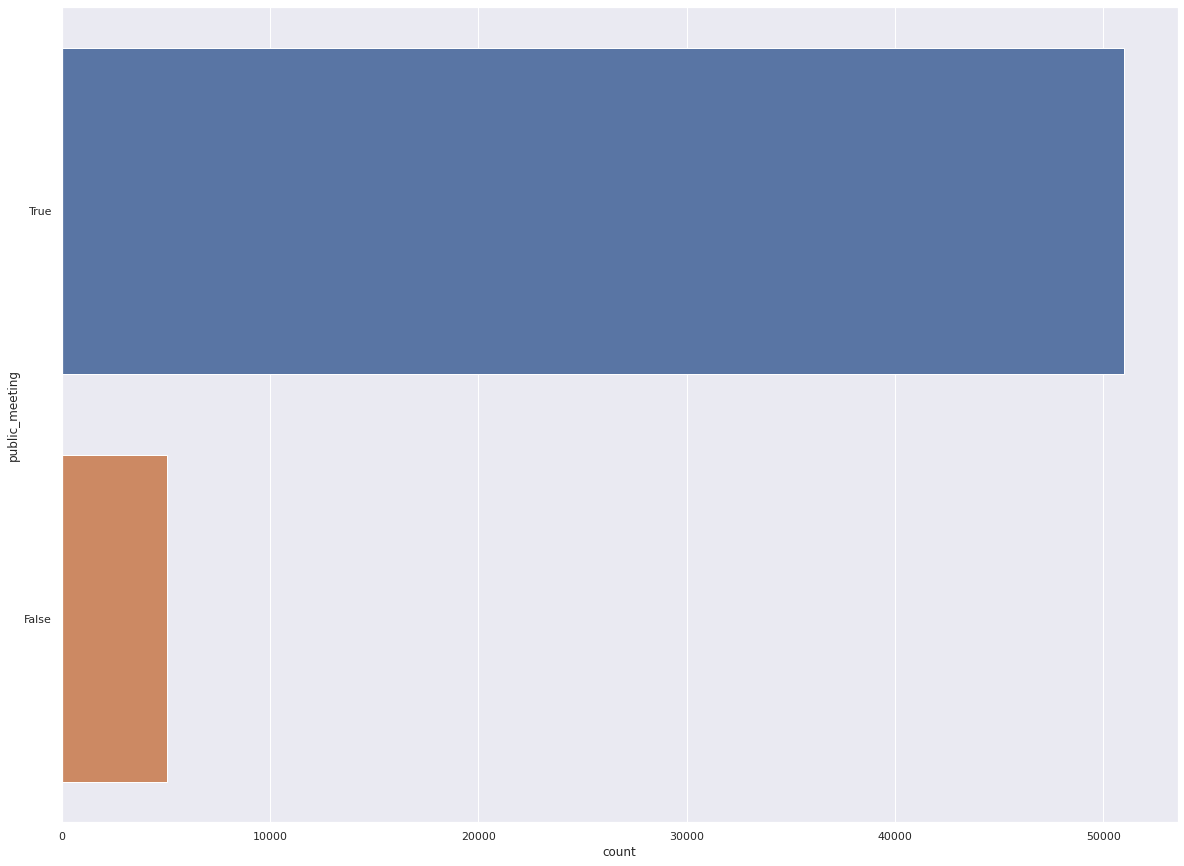

In [ ]:
public_meeting = sns.countplot(y = 'public_meeting', data = values,
                       order=values.public_meeting.value_counts().iloc[:25].index)

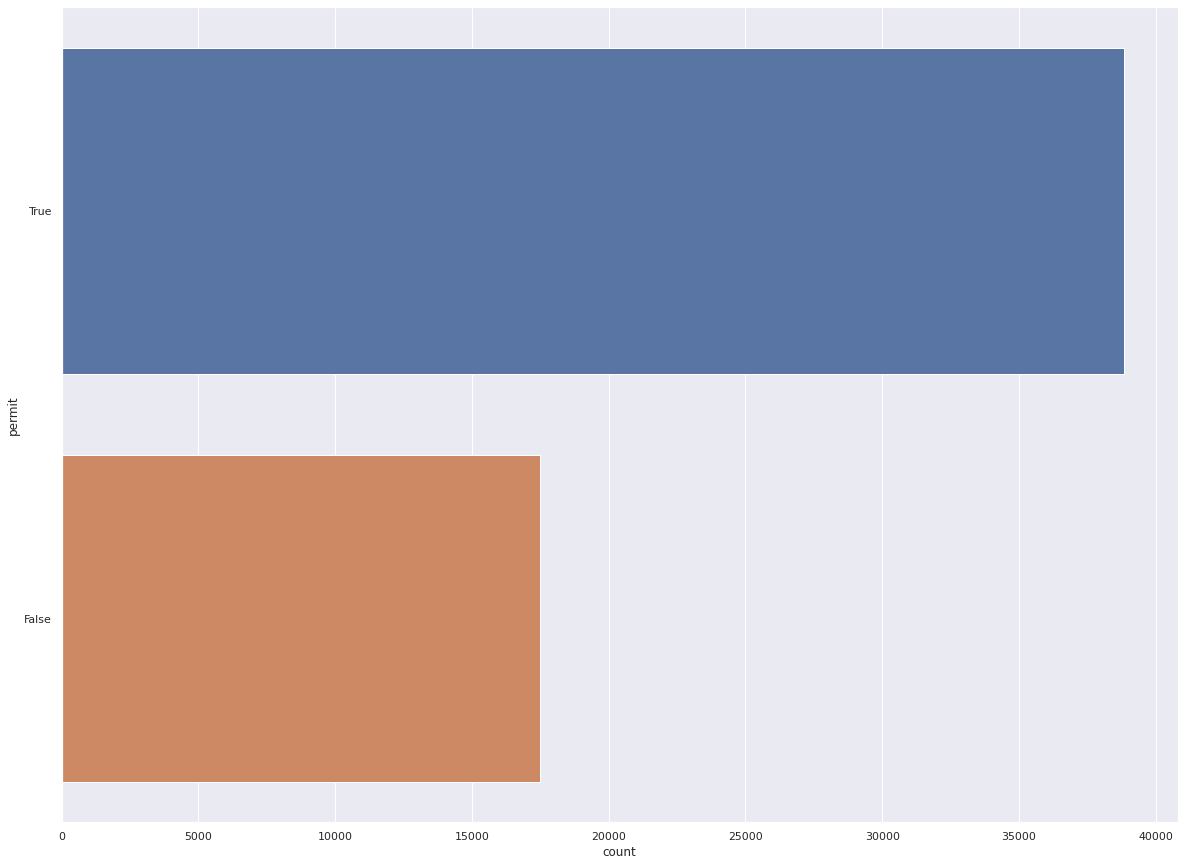

In [ ]:
permit = sns.countplot(y = 'permit', data = values,
                       order=values.permit.value_counts().iloc[:25].index)

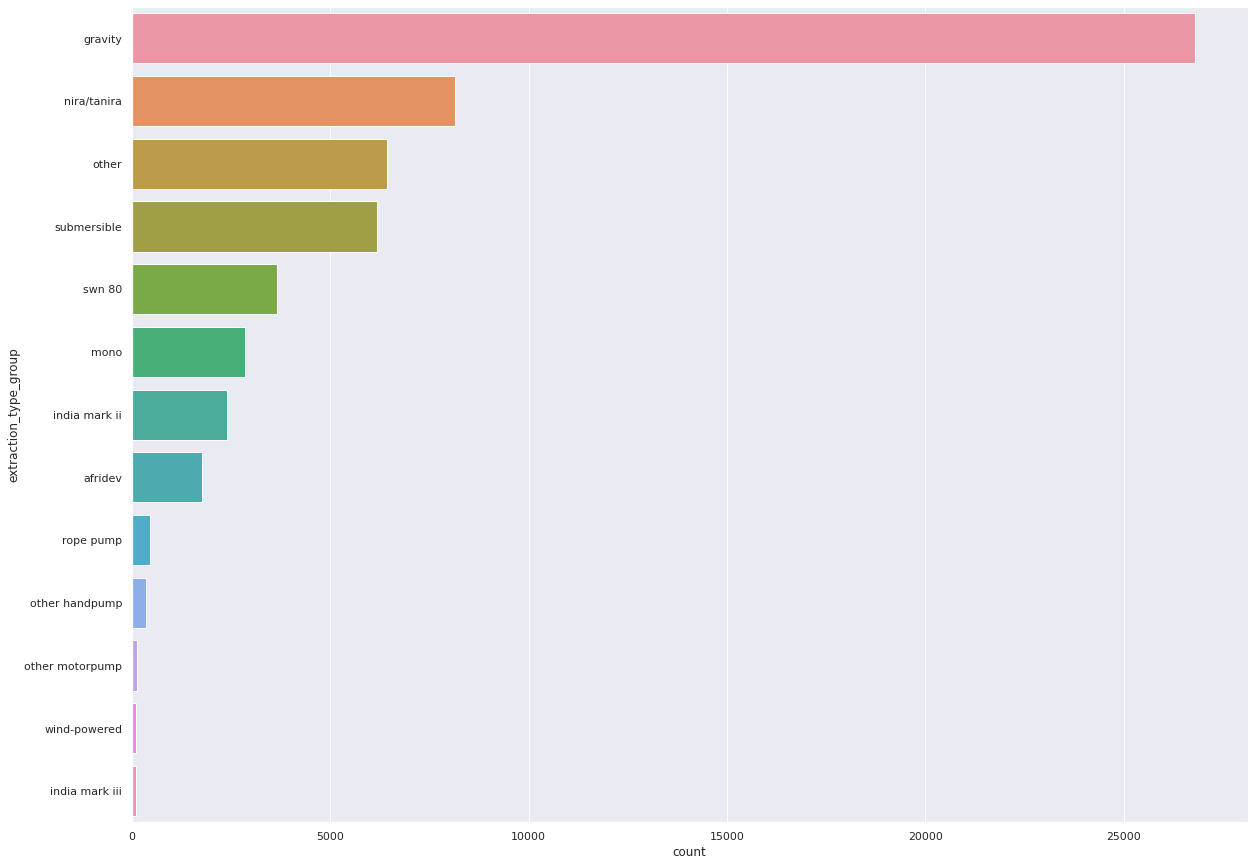

In [ ]:
extraction_type_group = sns.countplot(y = 'extraction_type_group', data = values,
                       order=values.extraction_type_group.value_counts().iloc[:25].index)

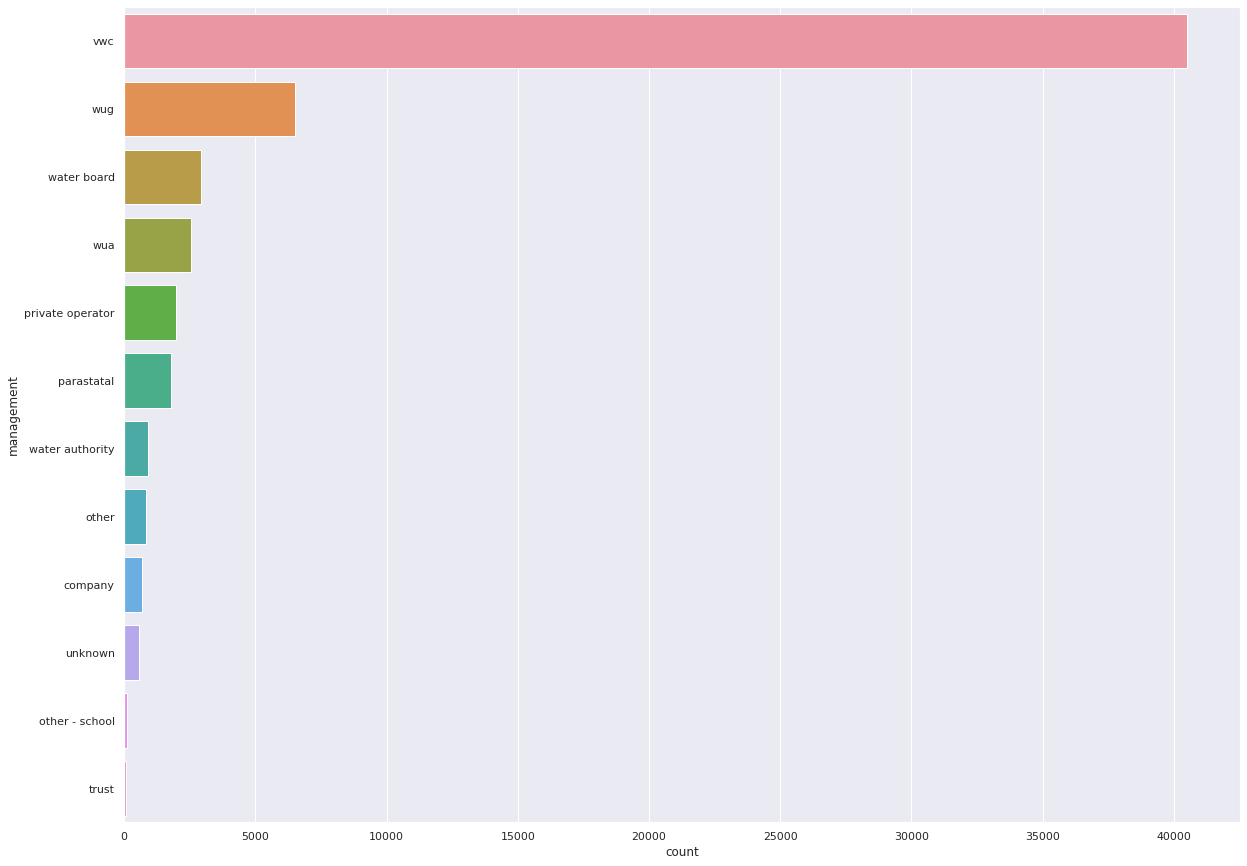

In [ ]:
management = sns.countplot(y = 'management', data = values,
                       order=values.management.value_counts().iloc[:25].index)

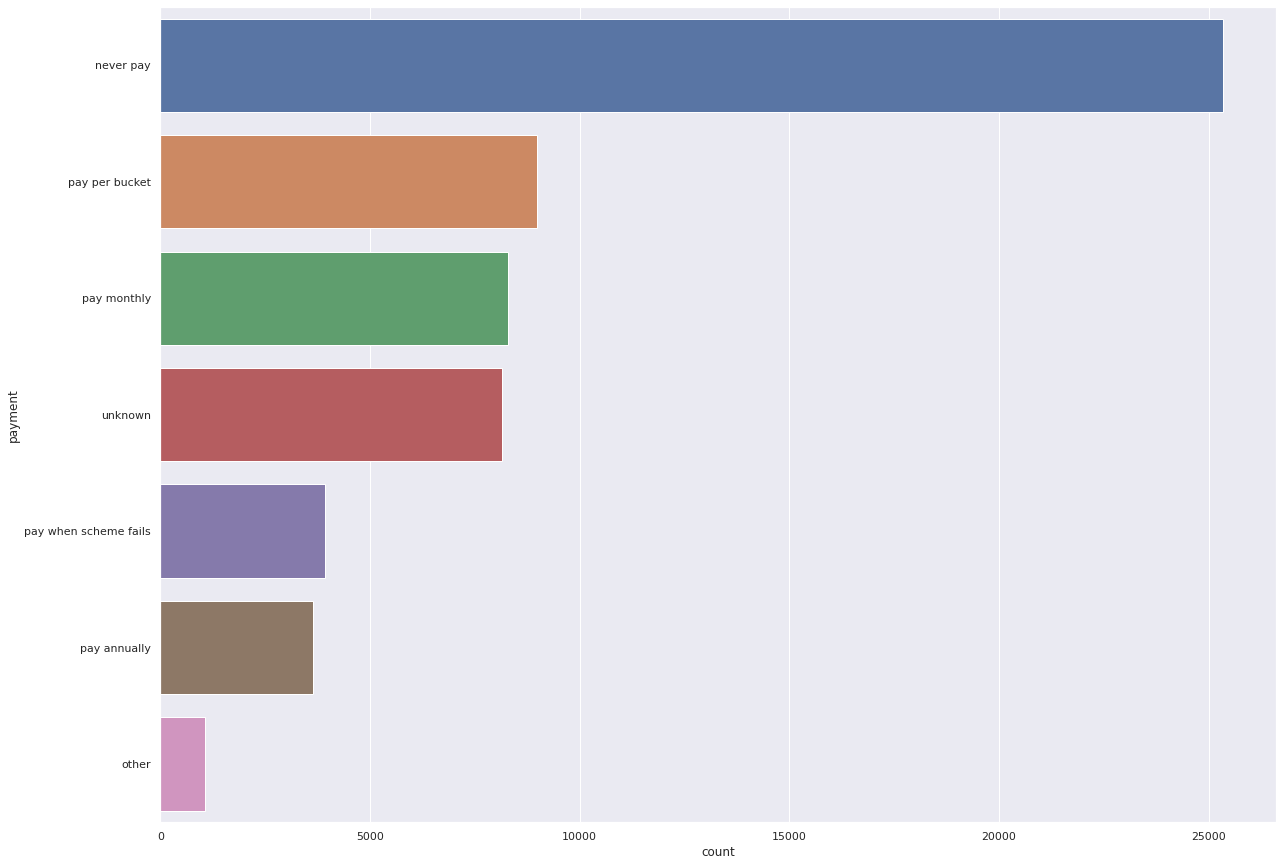

In [ ]:
payment = sns.countplot(y = 'payment', data = values,
                       order=values.payment.value_counts().iloc[:25].index)

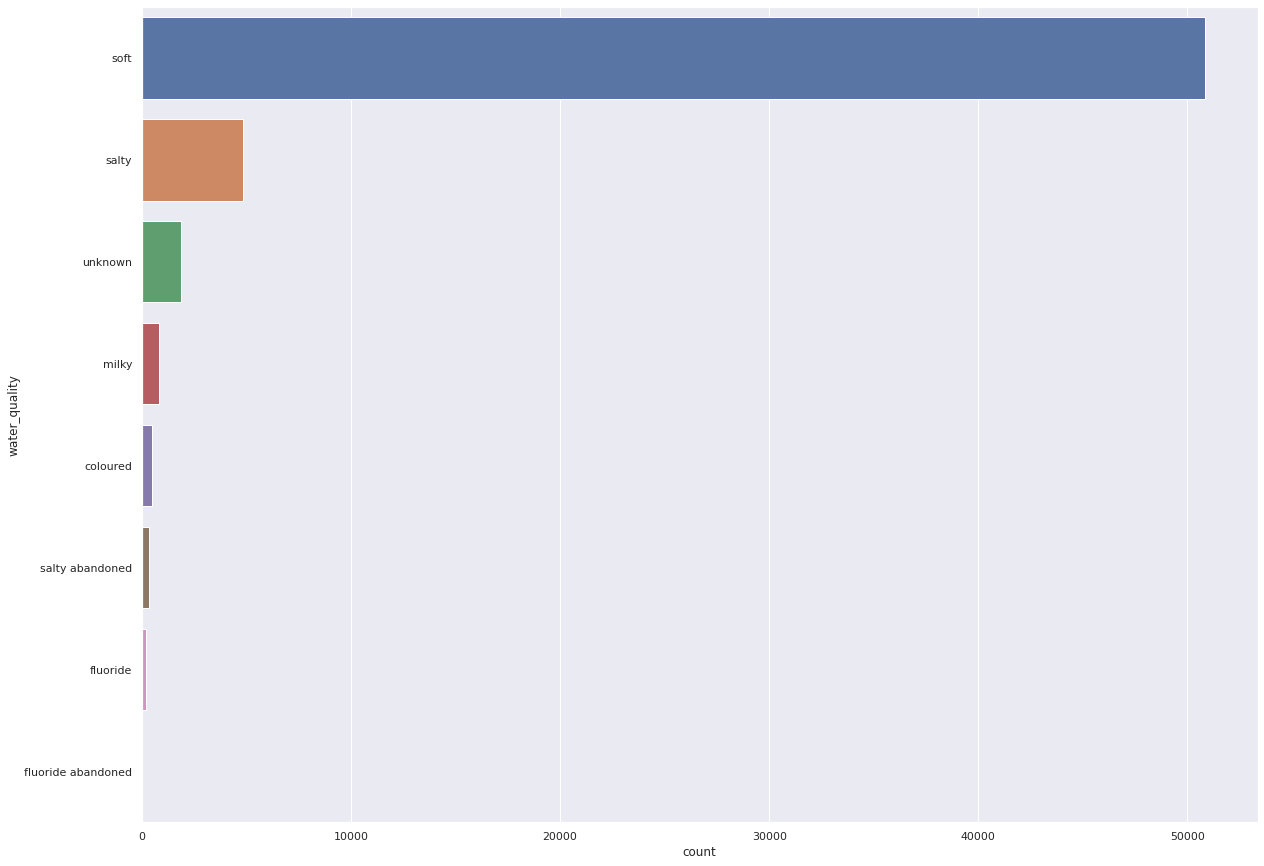

In [ ]:
water_quality = sns.countplot(y = 'water_quality', data = values,
                       order=values.water_quality.value_counts().iloc[:25].index)

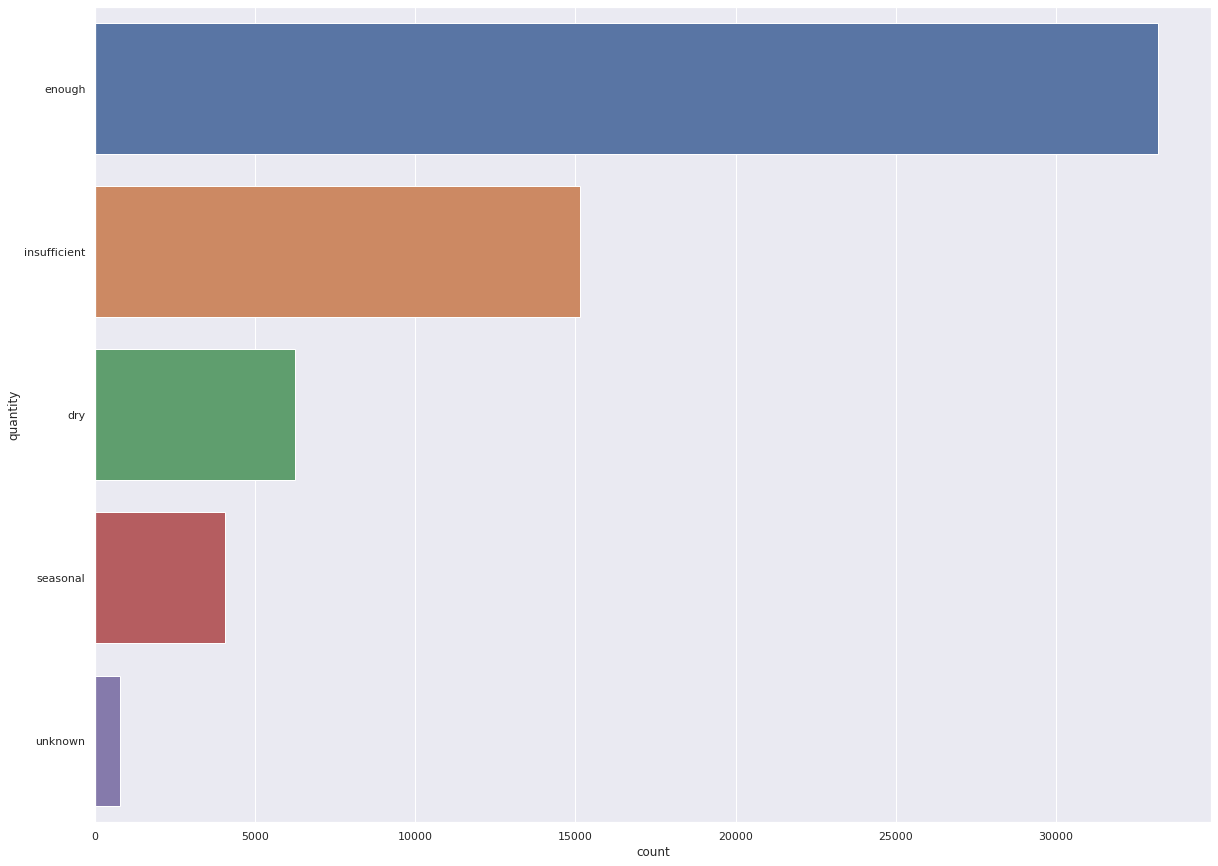

In [ ]:
quantity = sns.countplot(y = 'quantity', data = values,
                       order=values.quantity.value_counts().iloc[:25].index)

In [ ]:
#source                      10
#source_type                  7
#source_class                 3
#waterpoint_type              7
#waterpoint_type_group        6

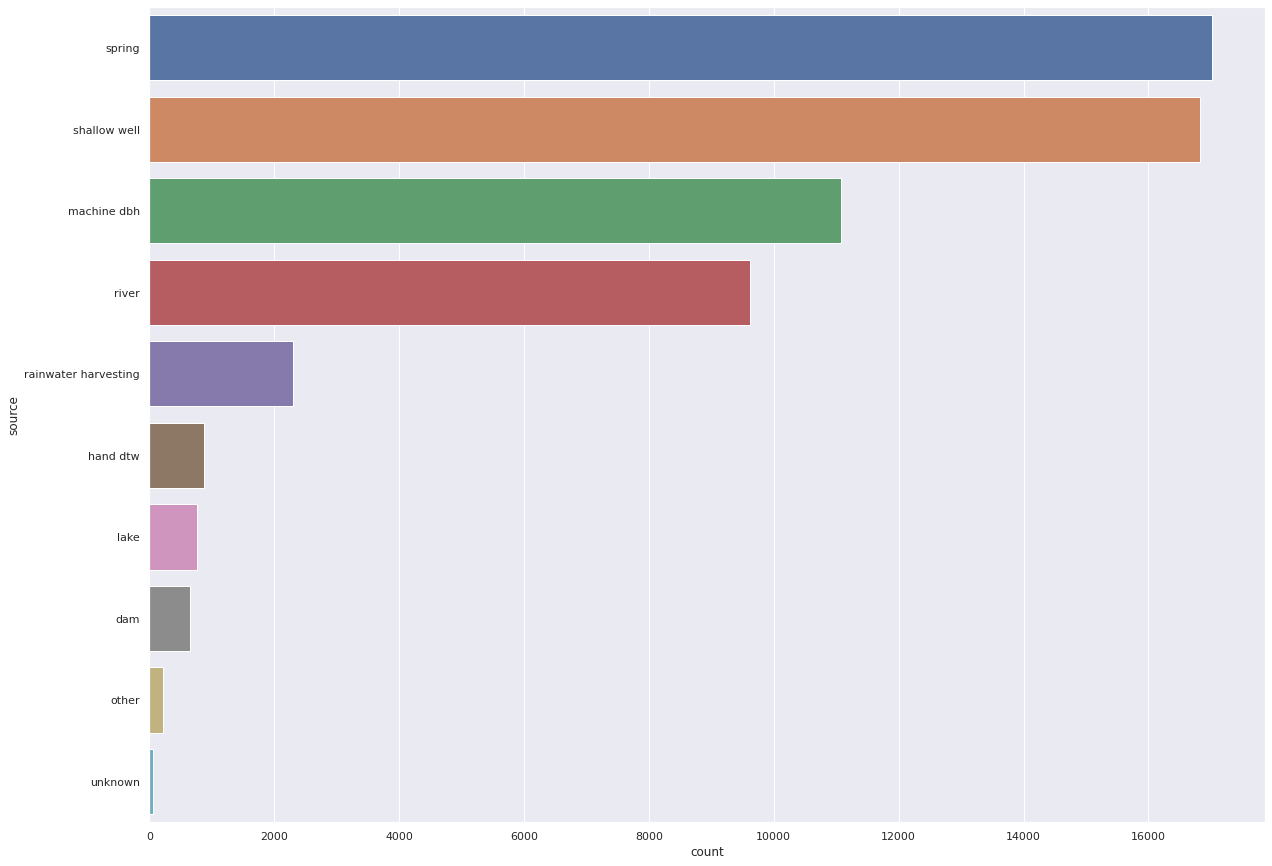

In [ ]:
source = sns.countplot(y = 'source', data = values,
                       order=values.source.value_counts().iloc[:25].index)

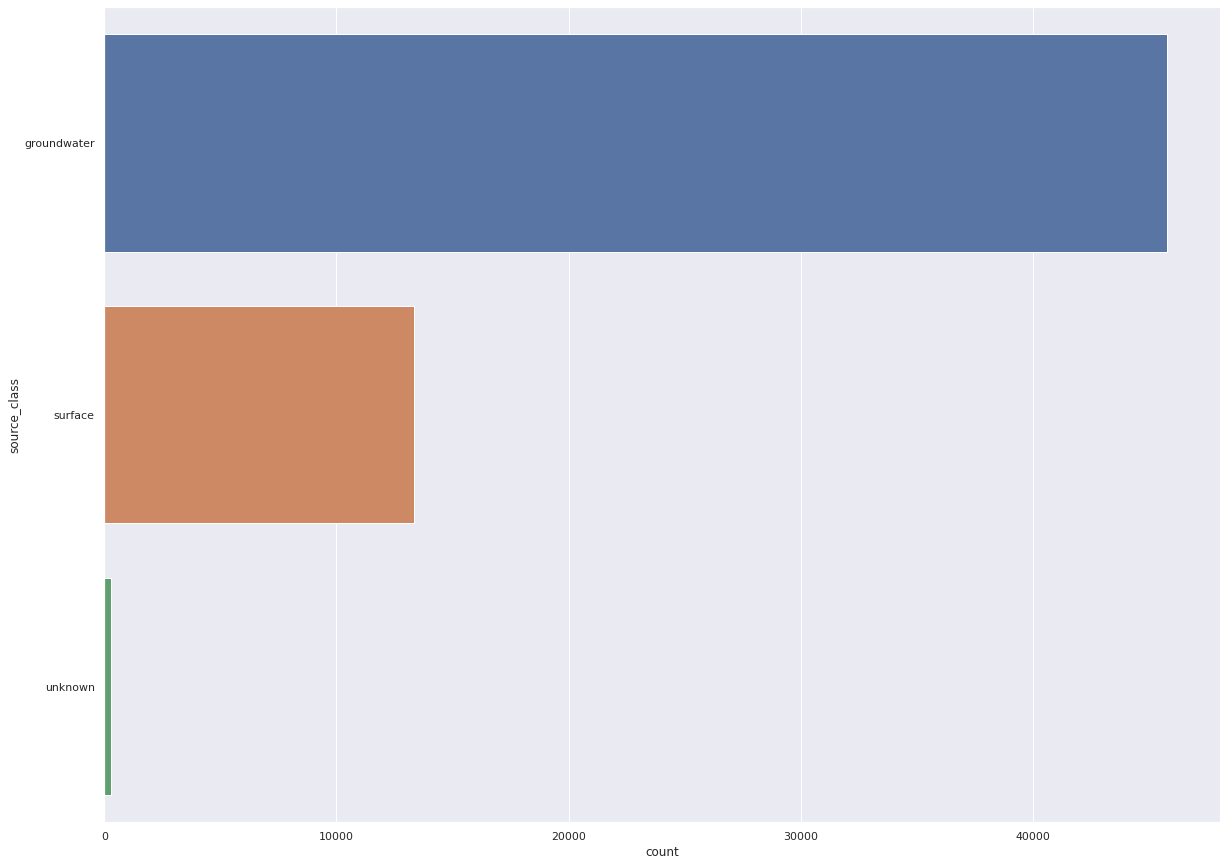

In [ ]:
source_class = sns.countplot(y = 'source_class', data = values,
                       order=values.source_class.value_counts().iloc[:25].index)

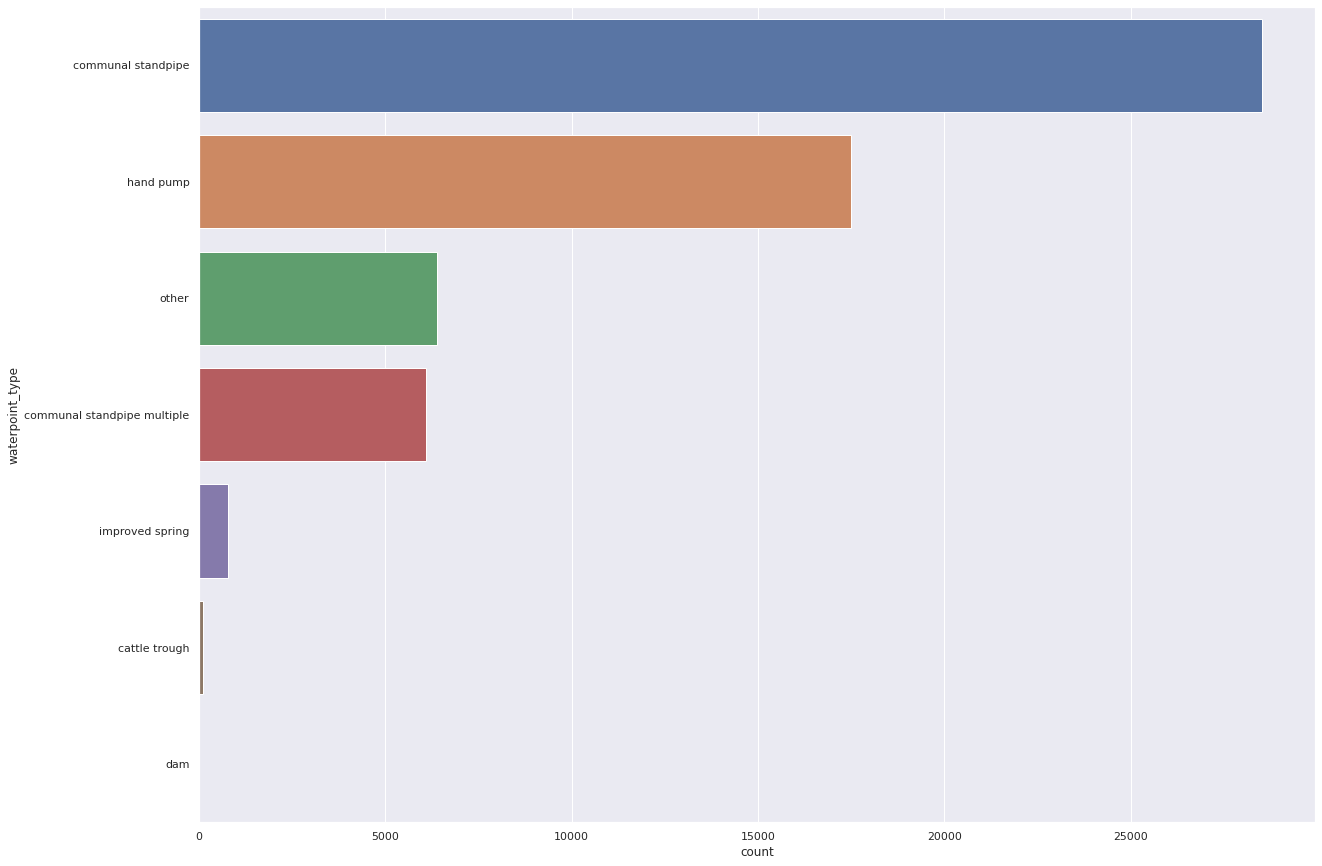

In [ ]:
waterpoint_type = sns.countplot(y = 'waterpoint_type', data = values,
                                order=values.waterpoint_type.value_counts().iloc[:25].index)

In [ ]:
# NUMERICAL COLUMNS

#id  (remove)                  
#amount_tsh  (remove)        
#gps_height          
#longitude             
#latitude              
#num_private           
#region_code           
#district_code         
#population             
#construction_year     

sns.set(rc = {'figure.figsize':(20,10)})

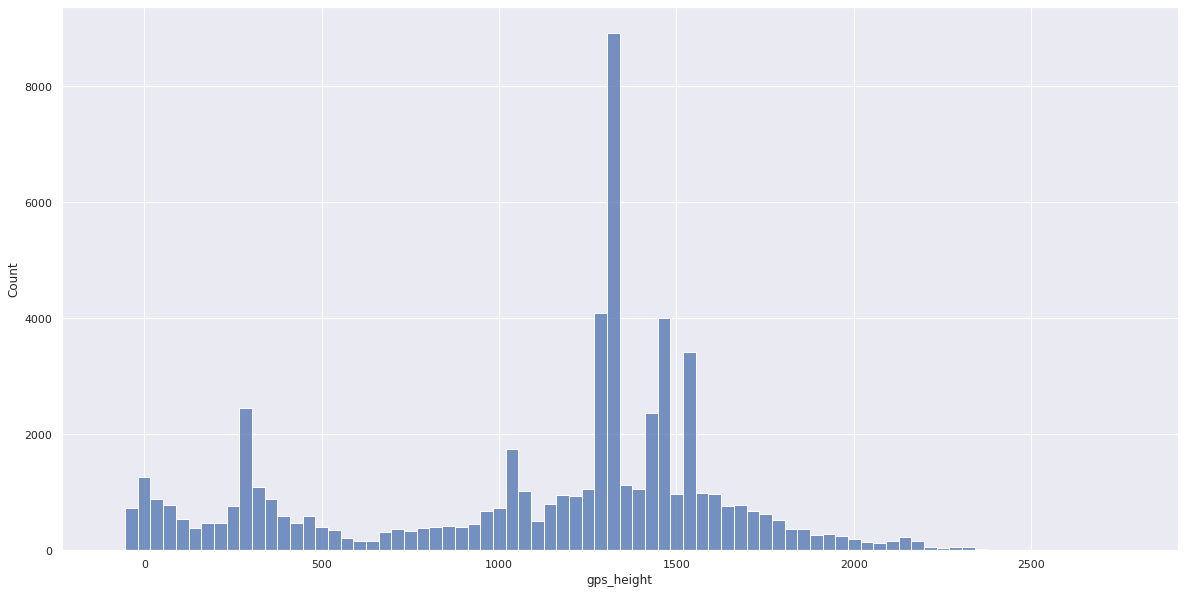

In [ ]:
sns.histplot(values['gps_height'])

# Zero and negative gps_height. Leave or impute: group by region ? 

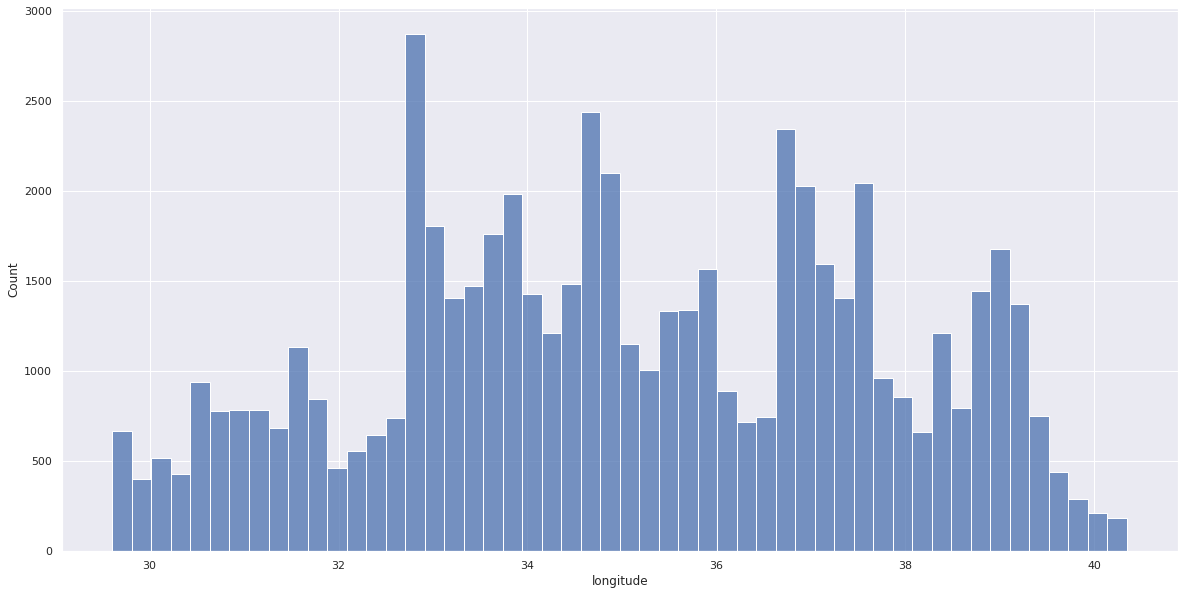

In [ ]:
sns.histplot(values['longitude'])

# Zero longitude. It is a point in the atlantic ocean. Impute: group by region ? 


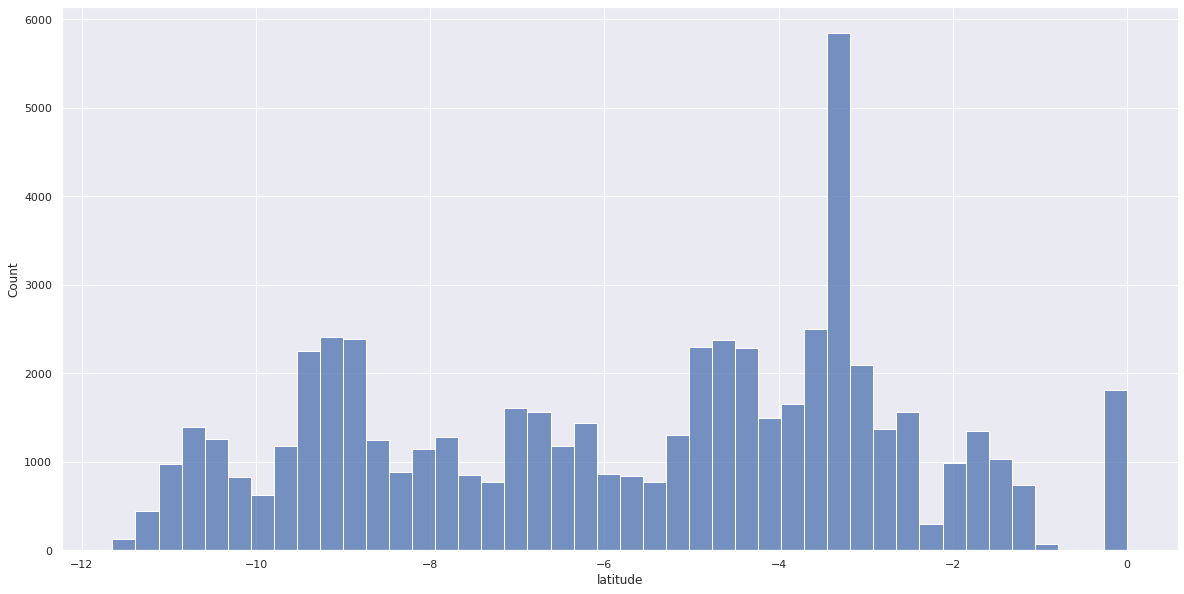

In [ ]:
sns.histplot(values['latitude'])

array(['11', '20', '21', '90', '18', '4', '17', '14', '60', '10', '3',
       '15', '19', '16', '80', '1', '6', '2', '12', '13', '5', '7', '99',
       '24', '9', '8', '40'], dtype=object)

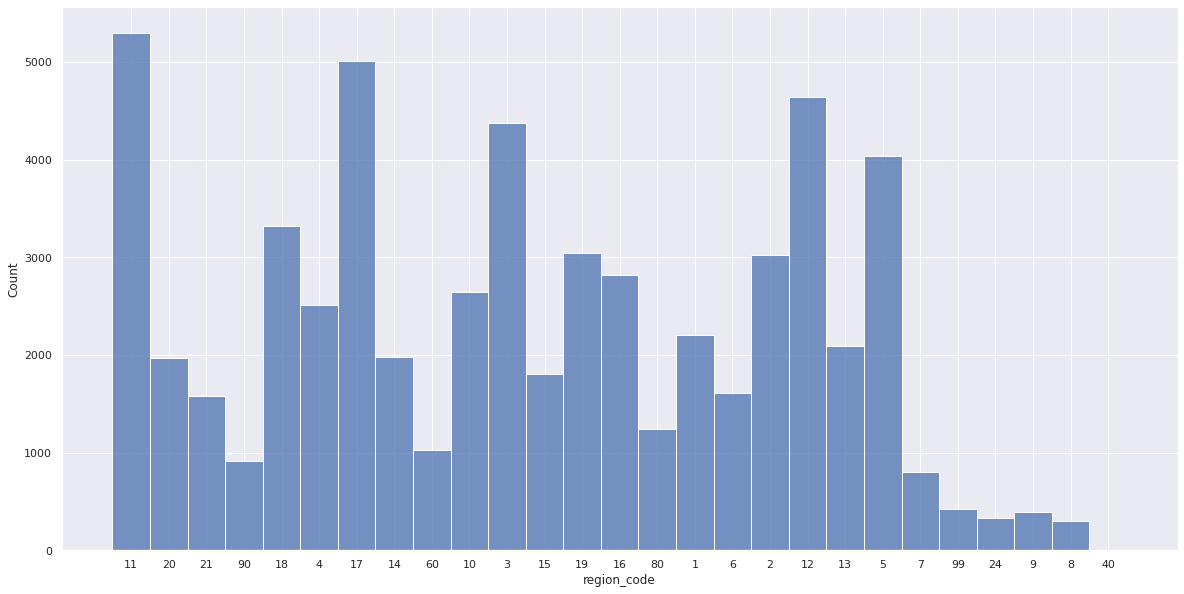

In [ ]:
sns.histplot(values['region_code'].astype(str))
values['region_code'].unique()


array(['5', '2', '4', '63', '1', '8', '3', '6', '43', '7', '23', '33',
       '53', '62', '60', '30', '13', '0', '80', '67'], dtype=object)

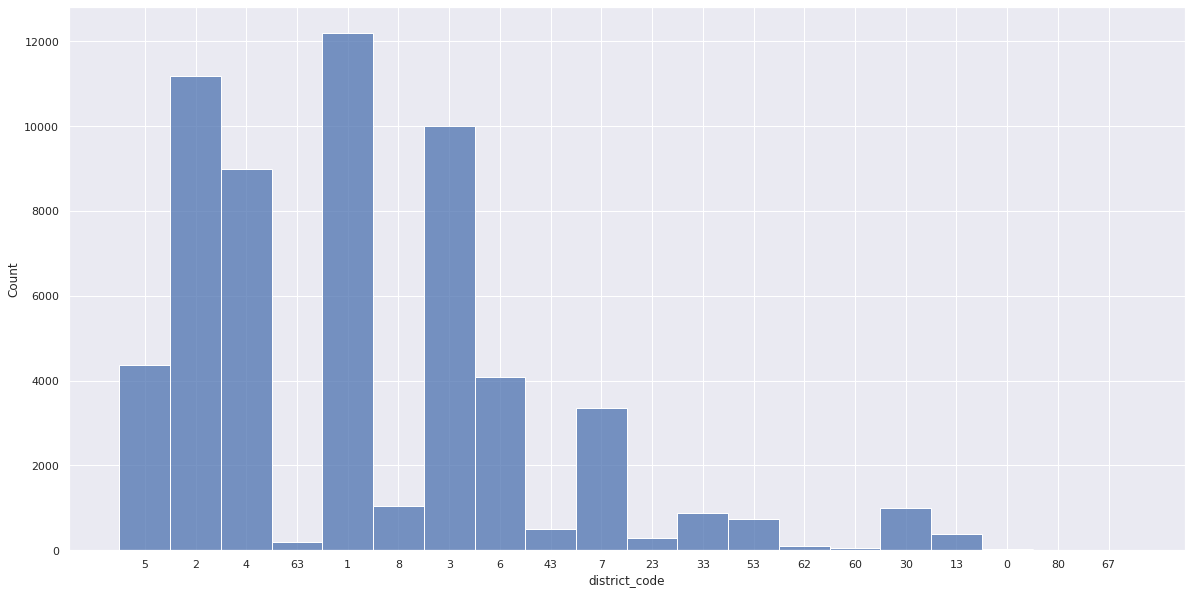

In [ ]:
sns.histplot(values['district_code'].astype(str))
values['district_code'].unique()

(0.0, 5000.0)

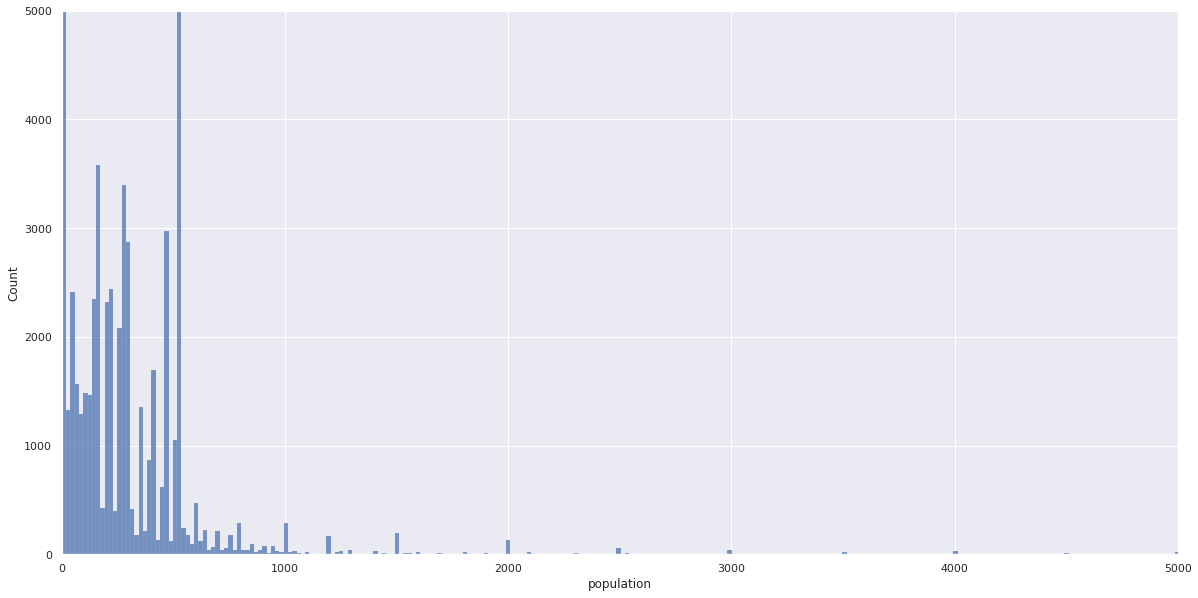

In [ ]:
sns.histplot(values['population'])
plt.xlim(0,5000)
plt.ylim(0,5000)

# Lot of zeroes. Mean impute: group by region

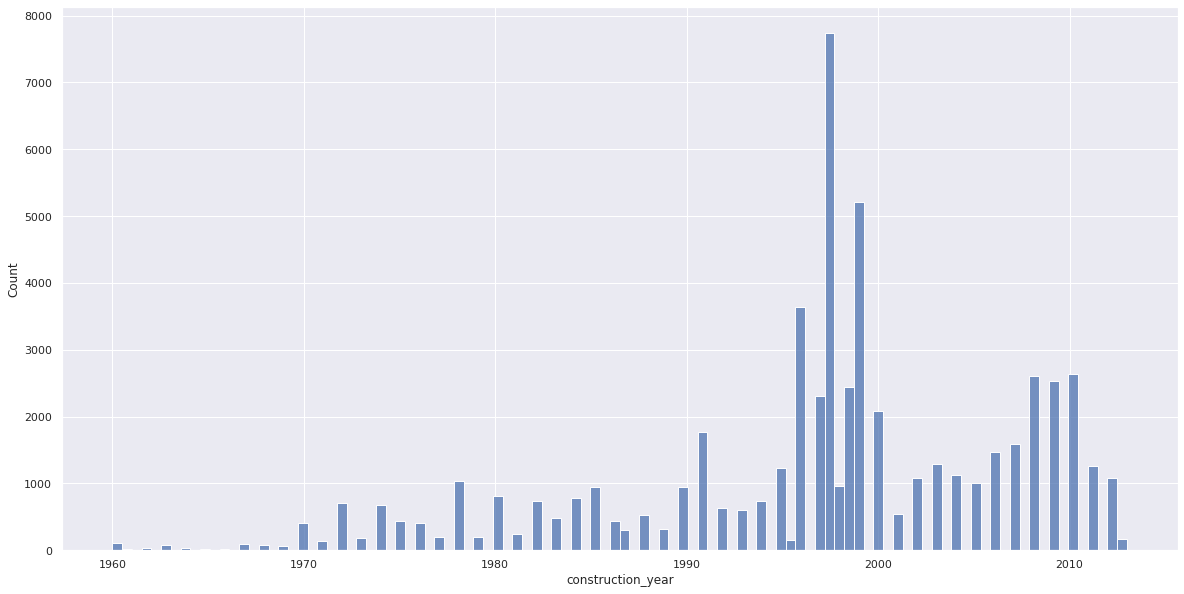

In [ ]:
sns.histplot(values['construction_year'])

#Zero construction year- Impute ? Mean or based on gps height ?
